In [28]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
#pd.set_option("precision",4)

# Market Data for US

In [110]:
df_CRSP_market_daily=pd.read_csv('../data/CRSP/CRSP Daily Index Built on Market Capitalization.csv',\
index_col=0,parse_dates=True)

In [111]:
df_CRSP_market_daily =df_CRSP_market_daily[['vwretd']]['2001-01-01':'2020-12-31']

In [26]:
df_AQR_risk_free_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='RF',header=18,index_col=0,parse_dates=True)
df_AQR_risk_free_daily= df_AQR_risk_free_daily['2001-01-01':'2020-12-31']

In [7]:
df_AQR_MKT_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='MKT',header=18,index_col=0,parse_dates=True)


In [8]:
df_AQR_MKT_daily.dropna()

,AUS,AUT,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,...,NZL,PRT,SGP,SWE,USA,Global,Global Ex USA,Europe,North America,Pacific
DATE,,,,,,,,,,,,,,,,,,,,,
1994-12-01,0.006537,-0.005481,0.001357,-0.002334,-0.005680,-0.002268,0.001512,-0.004559,0.008749,-0.003781,...,-0.004000,-0.000310,-0.005744,-0.005224,-0.010104,-0.006714,-0.004575,-0.005042,-0.009702,-0.004384
1994-12-02,-0.007824,-0.001062,-0.000646,0.005074,-0.000195,-0.006358,-0.006576,0.001152,-0.007588,0.000788,...,-0.015607,-0.002473,-0.020123,-0.005037,0.006906,-0.003197,-0.009539,-0.005418,0.006810,-0.013298
1994-12-05,0.009653,0.012571,0.009711,0.000023,0.011515,0.013710,0.003388,0.005488,0.011356,-0.000418,...,-0.002554,0.001123,0.002226,0.014306,0.000622,0.004824,0.007505,0.005344,0.000591,0.009486
1994-12-06,-0.004747,-0.003525,-0.003197,-0.005026,-0.005290,-0.008569,-0.008766,-0.000220,-0.000466,-0.002406,...,0.003609,0.001196,0.000702,-0.020711,-0.001737,-0.001276,-0.000984,-0.006014,-0.001908,0.002784
1994-12-07,-0.010167,0.004377,0.001042,-0.004124,-0.002759,0.004076,0.004157,0.002359,0.000583,0.000576,...,-0.000969,0.003732,-0.005965,-0.004381,-0.005369,-0.004215,-0.003485,-0.000160,-0.005305,-0.005752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,0.000888,0.000080,0.000080,-0.000003,0.000688,0.000080,-0.000285,0.000080,0.000080,0.000080,...,0.001701,0.000080,0.000042,0.002265,-0.000003,0.000292,0.000680,0.000343,-0.000003,0.001169
2020-12-28,-0.004658,0.015322,0.006432,-0.000003,0.018369,0.012818,0.025498,0.010168,0.015589,0.013450,...,-0.003846,0.019938,-0.002007,0.007428,0.003893,0.002876,0.001542,0.008480,0.003688,-0.005894
2020-12-29,0.013520,0.008205,0.006550,-0.001821,0.014272,0.002034,0.004637,0.005420,0.012188,0.008452,...,0.029562,0.003063,0.006650,0.017864,-0.003812,0.003095,0.012178,0.009819,-0.003707,0.017169


In [96]:
df_FF_5=pd.read_csv('../data/FF_Factors/F-F_Research_Data_5_Factors_2x3_daily.csv',index_col=0,parse_dates=True)
df_FF_5 = df_FF_5['2001-01-01':'2020-12-31']/100

In [97]:
df_FF_5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2001-01-02,-0.0352,0.0039,0.0165,0.0158,0.0161,0.00026
2001-01-03,0.0539,-0.0065,-0.0439,-0.0266,-0.0594,0.00026
2001-01-04,-0.0130,0.0097,-0.0030,0.0052,-0.0080,0.00026
2001-01-05,-0.0298,0.0071,0.0238,0.0190,0.0231,0.00026
2001-01-08,-0.0036,-0.0043,0.0126,0.0098,0.0067,0.00026
...,...,...,...,...,...,...
2020-12-24,0.0021,-0.0043,-0.0017,0.0024,-0.0005,0.00000
2020-12-28,0.0046,-0.0065,0.0032,0.0146,0.0050,0.00000
2020-12-29,-0.0040,-0.0142,0.0024,0.0075,-0.0028,0.00000


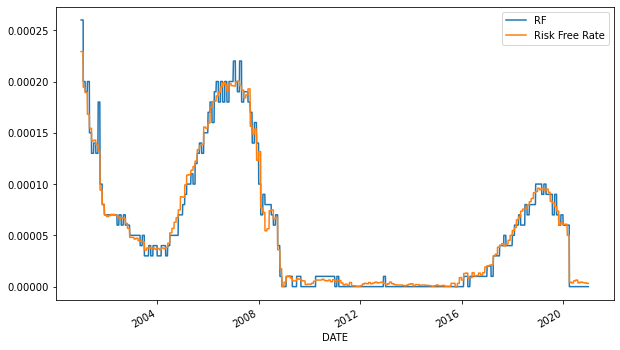

In [98]:
fig, ax =plt.subplots(figsize=(10,6))

df_FF_5.RF.plot(ax=ax)
(df_AQR_risk_free_daily).plot(ax=ax)

plt.legend()

In [102]:
df_FF_5.loc['2019-05-01']

Mkt-RF   -0.00830
SMB      -0.00080
HML      -0.00020
RMW       0.00360
CMA      -0.00030
RF        0.00009
Name: 2019-05-01 00:00:00, dtype: float64

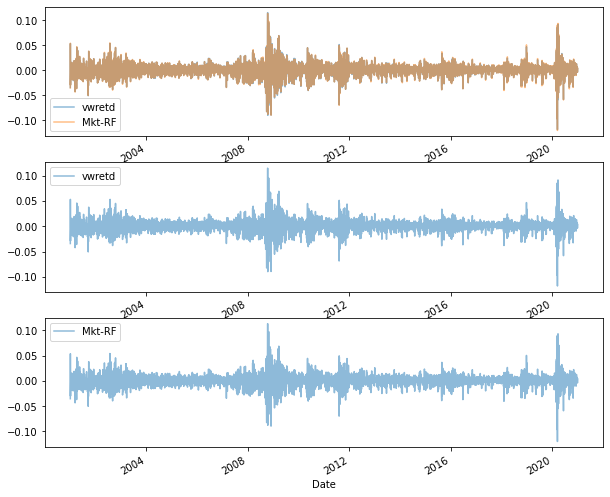

In [99]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(10,9))

(df_CRSP_market_daily.vwretd).plot(ax=ax[0],alpha=0.5)
df_FF_5['Mkt-RF'].plot(ax=ax[0],alpha=0.5)

(df_CRSP_market_daily.vwretd).plot(ax=ax[1],alpha=0.5)

df_FF_5['Mkt-RF'].plot(ax=ax[2],alpha=0.5)


ax[0].legend()
ax[1].legend()
ax[2].legend()

# Construct the Table 3

In [136]:
df_betas=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/beta.pickle')
df_returns=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/return.pickle')
df_betas = df_betas.astype('float64')
df_returns = df_returns.astype('float64')

<AxesSubplot:>

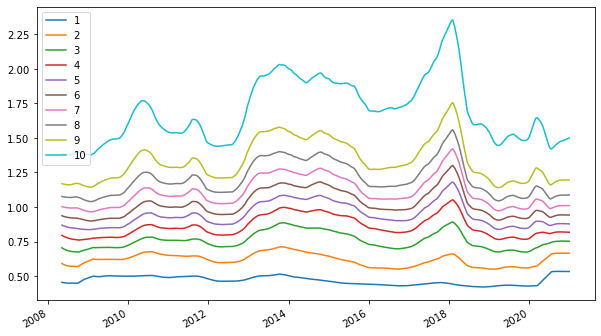

In [137]:
df_betas.rolling(90).mean().plot(figsize=(10,6))

<AxesSubplot:>

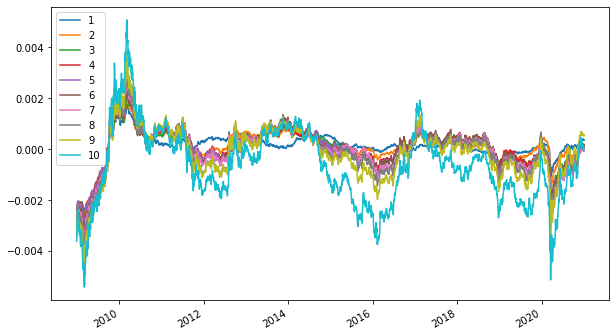

In [138]:
df_returns.rolling(252).mean().plot(figsize=(10,6))

In [57]:
df_table_3=pd.DataFrame(index=['Excess Return','CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha','Beta(ex ante)','Beta(realized)','Volatility','Sharpe Ratio'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [87]:
df_table_3.loc[df_table_3.index=='Beta(ex ante)',df_table_3.columns.difference(['BAB'],sort=False)]=\
df_betas.mean().values

In [88]:
df_table_3

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
Excess Return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAPM alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Three-factor alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Four-factor alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Five-factor alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beta(ex ante),0.46872,0.618295,0.755874,0.85834,0.941303,1.02067,1.10451,1.20094,1.33273,1.68642,NaN
Beta(realized),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volatility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sharpe Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_returns.dropna()

,1,2,3,4,5,6,7,8,9,10
2007-12-31,0.006843,0.002715,-0.002543,-0.002595,-0.003503,-0.003378,-0.004795,-0.006004,-0.004856,-0.005376
2008-01-02,0.004192,-0.002033,-0.009529,-0.009461,-0.01041,-0.01364,-0.01328,-0.01521,-0.01608,-0.01768
2008-01-03,0.007726,0.001886,-0.004976,-0.009151,-0.00806,-0.01133,-0.01398,-0.01585,-0.01524,-0.009561
2008-01-04,-0.0005681,-0.01183,-0.01977,-0.02073,-0.02707,-0.03354,-0.0341,-0.03803,-0.03948,-0.04222
2008-01-07,0.0009836,0.0003535,0.002173,0.001404,0.0007785,0.002699,0.002542,0.001209,0.002837,-0.003068
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.00235,0.001639,0.001931,-0.00256,-0.00224,-0.0001585,-0.0002984,0.001441,-0.0003205,-0.003347
2020-12-28,-0.003814,-0.0008344,0.001952,0.0004102,-9.515e-07,0.003746,0.001461,0.00434,0.003044,0.001013
2020-12-29,-0.004883,-0.006968,-0.008387,-0.007945,-0.01034,-0.01433,-0.01352,-0.01305,-0.01301,-0.01345
2020-12-30,0.005348,0.01068,0.01035,0.008681,0.00692,0.01205,0.008583,0.01154,0.0104,0.01159


In [143]:
df_Port_FF5=df_returns.merge(df_FF_5,left_index=True,right_index=True)

In [156]:
def get_alpha(df, factors,portfolio):
    x = df[factors].copy()
    x = sm.add_constant(x)
    results = sm.OLS(df_Port_FF5[portfolio], x).fit(cov_type='HC1')
    return results.params[0],results.params[1]

In [162]:
get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],1)

(-2.2913920765517518e-05, 0.21966650248315195)